¡Hola, Kanon!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b></b> <a class="tocSkip"></a>
    Se agregaron pruebas de Levene por prueba en el segmento de pruebas de hipótesis para validar varianzas en las pruebas t de medias.
</div> 

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Kanon! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 2</b> <a class="tocSkip"></a>

Hola Kanon! Has hecho un excelente trabajo con los ajustes, completaste los valores nulos con la mediana para no sesgar nuestros resultados. 

Sigue con el excelente trabajo!
</div>

#  1.1 Inicializacion

In [1]:
#importar librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from scipy import stats as st
import seaborn as sns

# 1.2 Cargar datos

In [2]:
# cargar los datos del Dataframe
df = pd.read_csv("/datasets/games.csv")


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

# 1.3 Tantear los datos

In [3]:
#visualizar la informacion del Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Visualizamos el Dataframe
df.sample(7)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.00,0.00,60.0,5.6,E
5956,Kurohyou: Ryu ga Gotoku Shinshou,PSP,2010.0,Adventure,0.00,0.00,0.29,0.00,NaN,NaN,NaN
3648,NBA 2K8,PS3,2007.0,Sports,0.50,0.01,0.00,0.05,81.0,6.8,E
8684,The Idolm@ster 2,PS3,2011.0,Misc,0.00,0.00,0.16,0.00,NaN,NaN,NaN
1376,LEGO Star Wars II: The Original Trilogy,PSP,2006.0,Action,0.58,0.50,0.00,0.32,83.0,8.6,E10+
4235,Dragon Ball Z: Sagas,PS2,2005.0,Fighting,0.38,0.01,0.00,0.06,49.0,5.4,T
2070,Road & Track Presents: The Need for Speed,PS,1995.0,Racing,0.56,0.38,0.00,0.07,NaN,NaN,NaN


In [5]:
#Ver casos de plataformas
df["Platform"].value_counts(dropna=False).sort_index()

2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: Platform, dtype: int64

Aqui vemos las plataformas las cuales estan en el Dataframe y cuantas veces se repiten, podemos ver cuales son las plataformas mas importantes  y cuales no se repiten tanto, no tenemos datos ausentes.

In [6]:
#Ver la columna de los Generos
df["Genre"].value_counts(dropna=False)

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
NaN                2
Name: Genre, dtype: int64

Aqui podemos ver superficialmente los generos de los videojuegos con los que trabajaremos en este Dataframe, podemos ver los que mas se repiten y los que menos se repiten, a diferencia de la columna de plataformas aqui no hay tanta variedad de generos, como si tenemos muchas diferentes plataformas. Tenemos dos datos ausentes como se podia ver al sacar la info() del Dataframe.

In [7]:
#Ver la columna rating
df["Rating"].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Aqui podemos ver la categoria de los juegos, siendo E(everyone = todos), T(teen-years), M(maduros), E10+(mayores de 10), EC(early-children), RP(rating-pendiente), K-A(kids and adults), AO(adults only), y los datos ausentes, que representan una gran cantidad de datos faltantes: 6766 datos ausentes.

No tenemos certeza absoluta del por que tenemos estos datos ausentes, pueden ser por varios factores, ya sea porque la persona que hizo el dataframe cometio errores, tambien puede ser que las fuentes de informacion omitieron ciertos detalles,
quizas no se arvicho toda la informacion por parte de las empresas de lanzamientos de estos juegos, o por simple mala recoleccion de datos, seria ideal poder hacer 

In [8]:
#Ver los años
df["Year_of_Release"].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64

Aqui podemos ver gracias al metodo describe() la informacion numerica de esta columna que nos muestra informacion a cerca de los años en los que se lanzaron los juegos, el cual se desprende esta informacion estadistica que nos puede ser de mucha utilidad para su futuro analizis, se desprende que tenemos algunos años ausentes, ya que se contaron 16446 años de un total de 16715 filas en el Dataframe.

In [9]:
# Ver critic_score
df["Critic_Score"].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

Aqui podemos ver la informacion estadistica de la columna numerica critic_score gracias al metodo decribe(). Podemos ver que la critica va desde 0 a 100 puntos, pudiendo ver ahi la informacion mas detallada con la que despues puede ser util para su analisis. Podemos ver hay una cantidad muy importante de datos ausentes, casi la mitad de echo.. por lo cual sera muy importante abordar este tema.

In [10]:
#ver user_score
df["User_Score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Aqui podemos ver que la calificacion de los usuarios va desde 0 a 10, tambien podemos ver que hay valores ausentes y un caso bastante particulpar de los valores "tdb", que significa "to be determined" (a determinar), ya lo veremos para trabajar y corregir esto para que no nos impida el futuro analisis. 

# 2.1 Procesar los datos #

In [11]:
#corregir las columnas a minusculas
df.columns = [x.lower() for x in df.columns]   
print(df.columns)  

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [12]:
#ver los casos perdidos o ausentes de la columna "name"
df[df["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Aqui tenemos muy pocos datos ausentes, por lo cual no habria problema con "eliminarlos" y simplemente reemplazar esos valores por no definidos.

In [13]:
#Remplzarar los datos perdidos o ausentes de la columna name con un "NOT DEFINED"
df.loc[df["name"].isna(), "name"] = "NOT DEFINED"

In [14]:
#Procesar la columna de plataformas
#Aqui crearemos una funcion para agrupar las plataformas
def platformgroup (x):
    if x in ["DS","3DS", "GB", "GBA", "GC", "N64", "NES", "SNES", "Wii", "WiiU"]:
        return "Nintendo"
    elif x in ["PS", "PS2", "PS3", "PS4", "PSP", "PSV"]:
        return "PlayStation"
    elif x in ["X360", "XB", "XOne"]:
        return "XBox"
    elif x in ["PC", "PCFX"]:
        return "PC"
    else:
        return "Other"
    
df["platform_group"] = df["platform"].apply(platformgroup)
(df.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group
1612,Transformers: Autobots / Decepticons,DS,2007.0,Action,1.12,0.02,0.00,0.09,NaN,NaN,NaN,Nintendo
9711,DS Yamamura Misa Suspense: Maiko Kogiku - Kish...,DS,2008.0,Adventure,0.00,0.00,0.12,0.00,NaN,NaN,NaN,Nintendo
764,Pokemon Ranger,DS,2006.0,Role-Playing,1.28,0.03,0.73,0.12,69.0,7.6,E,Nintendo
113,Need for Speed Underground 2,PS2,2004.0,Racing,2.71,3.02,0.08,1.09,82.0,8.6,E,PlayStation
13804,Superman: Countdown to Apokolips,GBA,2003.0,Platform,0.03,0.01,0.00,0.00,47.0,5.7,E,Nintendo


Creamos una columna con el nombre de cada empresa detras de cada plataforma o consolda de videojuegos para poder visualizar mejor los datos a cerca del comportamiento de cada empresa y poder agrupar de mejor forma las plataformas. Lo cual puede ser util para futuros analisis mas profundos.

In [15]:
print(df["platform_group"].value_counts())

PlayStation    6720
Nintendo       6270
XBox           2333
PC              975
Other           417
Name: platform_group, dtype: int64


Aqui podemos ver el volumen de nuestros datos en relacion a las empresas de plataformas detras de cada consola.

In [16]:
#Eliminar las columnas con los años de lanzamiento ausentes o perdidos
df = df.dropna(subset = ["year_of_release"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  platform_group   16446 non-null  object 
dtypes: float64(6), object(6)
memory usage: 1.6+ MB


<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información con proxys. Por ejemplo en este caso los podríamos completar con los años de lanzamientos de los juegos en otras plataformas
</div>

Eliminamos aprox. de 300 filas de datos ya que no teniamos el año de lanzamiento, por lo cual preferi no usarlas.

In [17]:
#convertir los datos de la columna a los tipos necesarios
df["year_of_release"] = df["year_of_release"].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  platform_group   16446 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.6+ MB


In [18]:
#En la columna de generos ver los datos ausentes
df[df["genre"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group
659,NOT DEFINED,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,Other
14244,NOT DEFINED,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,Other


In [19]:
#Reemplazamos los datos perdidos por "no definidos"
df["genre"] = df["genre"].fillna("NOT DEFINED")

Aqui podemos ver que son los mismos datos perdidos que teniamos previamente cuando revisamos en la columna "name", ahora nuevamente reemplazamos con "no definido" en la columna de genero. 

In [20]:
#Trabajar en la columna "user_score"
#Procesar los valores "tbd"
#Cambiamos de tbd a Nan
df.loc[df["user_score"] == "tbd", "user_score"] = np.nan
#Ahora reemplazamos los valores ausentes por la mediana
df["user_score"].fillna((df["user_score"].median()), inplace=True)
#Transformamos de tipo object a float esta columna
df["user_score"] = df["user_score"].astype(float)
#Estandarizar con critic_score es decir multiplicarlo por 10
df["user_score"] = df["user_score"] * 10
df["user_score"].describe()

count    16446.000000
mean        73.304329
std         10.270379
min          0.000000
25%         75.000000
50%         75.000000
75%         75.000000
max         97.000000
Name: user_score, dtype: float64

In [21]:
#Trabajar en la columna rating
#Cambiar a nombres mas faciles de entender para todos
def rating_name (x):
    if x == "E" or x == "K-A":
        return "Everyone"
    elif x == "M":
        return "Mature"
    elif x == "T":
        return "Teens"
    elif x == "E10+":
        return "Everyone +10"
    elif x == "AO":
        return "Olny Adults"
    elif x == "EC":
        return "Early Childhood"
    elif x == "RP":
        return "Pending"
    else:
        return "Pending"
    
    
df["rating_clarity"] = df["rating"].apply(rating_name)
df.sample(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_clarity
13272,The Grim Adventures of Billy & Mandy,Wii,2006,Action,0.04,0.00,0.00,0.00,NaN,75.0,NaN,Nintendo,Pending
14955,Wand of Fortune 2 FD: Kimi ni Sasageru Epilogue,PSP,2012,Adventure,0.00,0.00,0.03,0.00,NaN,75.0,NaN,PlayStation,Pending
13624,Praetorians,PC,2003,Strategy,0.00,0.04,0.00,0.00,78.0,82.0,T,PC,Teens
6759,Wipeout 2,DS,2011,Misc,0.23,0.00,0.00,0.02,NaN,75.0,E,Nintendo,Everyone
976,The Evil Within,PS4,2014,Action,0.55,0.86,0.11,0.27,75.0,73.0,M,PlayStation,Mature
7734,Iron Chef America: Supreme Cuisine,DS,2008,Simulation,0.18,0.00,0.00,0.01,NaN,75.0,E10+,Nintendo,Everyone +10
7368,NOëL: NOT DiGITAL,PS,1996,Adventure,0.00,0.00,0.20,0.01,NaN,75.0,NaN,PlayStation,Pending


In [22]:
df["rating_clarity"].value_counts()

Pending            6679
Everyone           3924
Teens              2905
Mature             1536
Everyone +10       1393
Early Childhood       8
Olny Adults           1
Name: rating_clarity, dtype: int64

Aqui preferi crear una nueva columna para ver mas claramente la informacion que nos proporionan en la columna rating pero aqui en una nueva columna para procesar mejor los datos no tan solo para mi, sino para tambien a alguien que no entiende las clasificaciones que nos aparecen en rating. Ahora podemos ver mejor su volumen y con esto vamos a poder darle un mejor analisis futuro.

In [23]:
#Crear una columna Total_sales con el total de ventas
df["total_sales"] = df[["na_sales","eu_sales","jp_sales","other_sales"]].sum(axis=1)
#df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"] 
df.sample(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_clarity,total_sales
12377,Tokobot,PSP,2005,Platform,0.06,0.00,0.00,0.00,72.0,73.0,E,PlayStation,Everyone,0.06
3634,Sakura Wars,SAT,1996,Adventure,0.00,0.00,0.55,0.00,NaN,75.0,NaN,Other,Pending,0.55
5139,Shin Megami Tensei II,SNES,1994,Role-Playing,0.00,0.00,0.37,0.00,NaN,75.0,NaN,Nintendo,Pending,0.37
8568,Rio,DS,2011,Misc,0.12,0.03,0.00,0.01,59.0,75.0,E,Nintendo,Everyone,0.16
5913,Spirit: Stallion of the Cimarron,GBA,2002,Platform,0.21,0.08,0.00,0.01,46.0,75.0,E,Nintendo,Everyone,0.30
13818,Imperial Glory,PC,2005,Strategy,0.00,0.04,0.00,0.00,69.0,84.0,T,PC,Teens,0.04
3171,X-Men Legends II: Rise of Apocalypse,PS2,2005,Role-Playing,0.53,0.02,0.00,0.09,82.0,73.0,T,PlayStation,Teens,0.64


<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 
    
Solamente los valores nulos de las variables de score te recomiendo completarlos con la mediana para no sesgar nuestros resultados


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Excelente trabajo completando los valores nulos con la mediana para no sesgar nuestros resultados!

Okey, muchas gracias revisor ya reemplace los valores nulos por la mediana en la casilla donde trabaje la columna "user_score", lo mismo con la columna "critic_score". 

In [24]:
#Ajustar la columna critic_score
#Reemplazar valores nulos con la mediana para no sesgar nuestros resultados
df["critic_score"].fillna((df["critic_score"].median()), inplace=True)
df["critic_score"].isna().sum()

0

Aqui creamos una nueva columna con la que trabajaremos en el futuro analisis, donde sumamos las ventas de todas las regiones y lo agreupamos en la nueva columna "total_sales" o total de ventas.

In [25]:
#Revisar los duplicados implicitos
df[df[["name","platform"]].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_clarity,total_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,85.0,T,XBox,Teens,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,85.0,T,PC,Teens,0.08
14244,NOT DEFINED,GEN,1993,NOT DEFINED,0.0,0.00,0.03,0.00,71.0,75.0,NaN,Other,Pending,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,55.0,E,PlayStation,Everyone,0.01


In [26]:
df = df.drop([1591,11715,14244,16230]).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  float64
 9   user_score       16442 non-null  float64
 10  rating           9765 non-null   object 
 11  platform_group   16442 non-null  object 
 12  rating_clarity   16442 non-null  object 
 13  total_sales      16442 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 1.8+ MB


# 3.1 Analisis de datos

### Visualizar datos ####

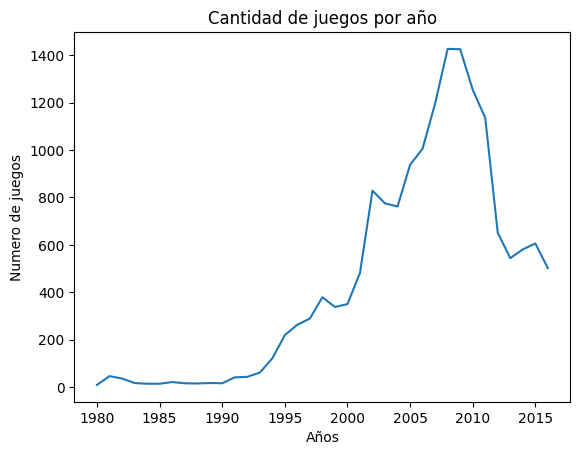

In [27]:
#¿Cuantos juegos fueron lanzados por año?
games_per_year = df["year_of_release"].value_counts().sort_index()
games_per_year.plot(kind="line", 
                    title="Cantidad de juegos por año",
                    xlabel="Años",
                    ylabel="Numero de juegos")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Exelente trabajo con el desarrollo de la gráfica, nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



Podemos ver como desde el año 1995 comenzo a aumentar la cantidad de juegos pero el "bom" llego en los 2000 gracias a que hubo una "revolucion" tecnologica donde comenzaron a hacer dispositivos con mejores tecnologias. El aumento fue sobretodo en el año 2008 donde fue el verdadero mayor "bum" pero los años que vinieron despues se fue a la bajada aparentemente por la crisis economica del año 2008 que tuvo un impacto colateral tan grande que la demanda de los juegos se vio afectada.

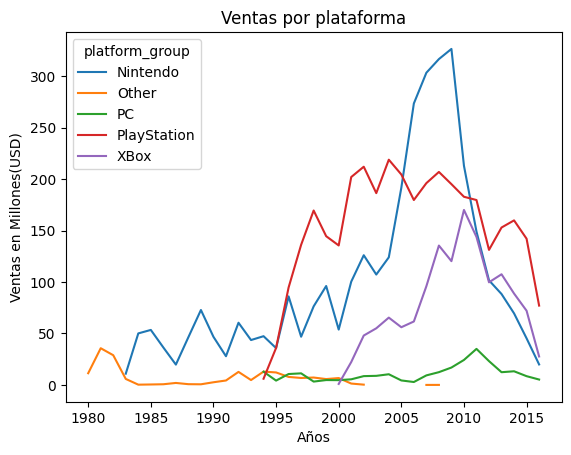

In [28]:
#Ver informacion de las ventas totales de cada plataforma(agrupada)
sales_per_platform = df.pivot_table(
    index = "year_of_release",
    columns = "platform_group",
    values = "total_sales",
    aggfunc = "sum")

sales_per_platform.plot(kind="line",
         title= "Ventas por plataforma", 
         xlabel= "Años",
         ylabel= "Ventas en Millones(USD)")
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

Respuesta: Muchas gracias por la recomendacion, en este caso hice este grafico antes de "acortar el periodo de años" basicamente para tener claro el comportamiento a grandes rasgos, sin analizar de forma tan clara, fue basicamente para visualizar sin grandes detalles y ya despues acortar el periodo de tiempo a uno mas actualizado, pero de momento este grafico lo hice para orientarme y darme una pequeña idea... ya despues realizar un analisis mas actualizado, es mas el grafico de caja y bigotes con exactamente la misma informacion pero desde el 2011-2017. Solamente por eso de mi parte me gustaria mantener este grafico tal cual ya que muestra mas mi forma de empezar el analisis y para orientarme mas al momento de comenzar.

En el grafico podemos ver que el comportamiento de las ventas de estas plataformas, podemos apreciar cuales son las plataformas con ventas mas altas, las cuales podemos ver que son estas 3: PlayStation, Nintendo, Xbox.
Esta informacion nos servira de guia para el proximo analisis donde responderemos las preguntas de negocio para ver el tiempo de duracion en que las plataformas alcanzan una gran cantidad de ventas hasta que desaparecen.

Aqui podemos ver como las plataformas que pertenecen a "other" fueron los pioneros en el mundo de los videojuegos pero con el surgimiento de Nintendo, su primera competencia bajaron bastante, y con las demas empresas de plataformas que fueron surgiendo, las del grupo "other" fueron desapareciendo y duraron al rededor de 20 años estas plataformas en el mercado hasta que desaparecieran, ese periodo fue desde los años 2001 hasta 2003, luego volvieron en 2008 hasta que desaparecieron finalmente, lo cual en ese periodo de "desaparecer del mercado" fue entre 2001 a 2008(7 años aprox) justo como nos lo indican los analisis posteriores. Por otro lado cuando empezaron a aparecer las nuevas plataformas generalmente tardan 1 años aprox.(justo como tambien nos lo indican los analisis posteriores) en establecerse y dar su aparicion a nivel mundial.

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer? ###

In [29]:
#Ver cuanto se demoran en aparecer las nuevas plataformas y en desaparecer las antiguas
#Para el objetivo que es ver el tiempo que duran las plataformas, primero veamos las ventas totales por plataforma.
totalsales_per_platform = df.groupby("platform")["total_sales"].sum()
totalsales_per_platform.sort_values(ascending=False)

platform
PS2     1233.56
X360     959.99
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.68
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.74
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

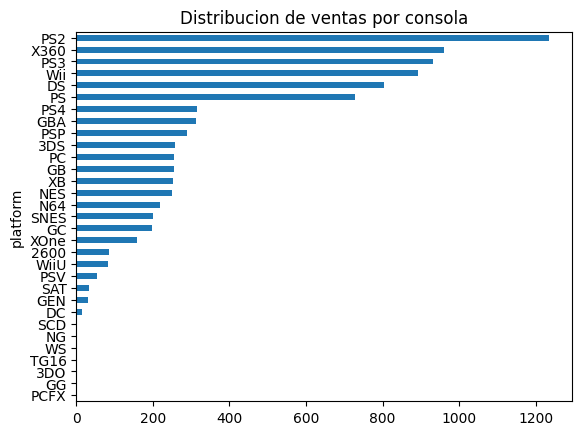

In [30]:
totalsales_per_platform.sort_values().plot(kind="barh",
                                          ylabel="",
                                          title="Distribucion de ventas por consola")
plt.show()

Aqui podemos visualizar las plataformas que mas ventas han tenido, de todas esas plataformas seleccionaremos las que tuvieron ventas mayores a 500 millones de USD como parametro para analizar su comportamiento en el tiempo.

In [31]:
top_sales_platform = totalsales_per_platform.reset_index()
top_sales_platform = top_sales_platform[top_sales_platform["total_sales"] >= 500]
top_sales_platform = top_sales_platform.sort_values(by="total_sales",ascending=False).reset_index(drop=True)
top_sales_platform

,platform,total_sales
0,PS2,1233.56
1,X360,959.99
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58


Podemos ver que son 6 las plataformas que superaron los 500 millones de USD. 

In [32]:
#Almacenar en una lista las plataformas que cumplen con el parametro
top6_platform_list = ["PS2","X360","PS3","Wii","DS","PS"]

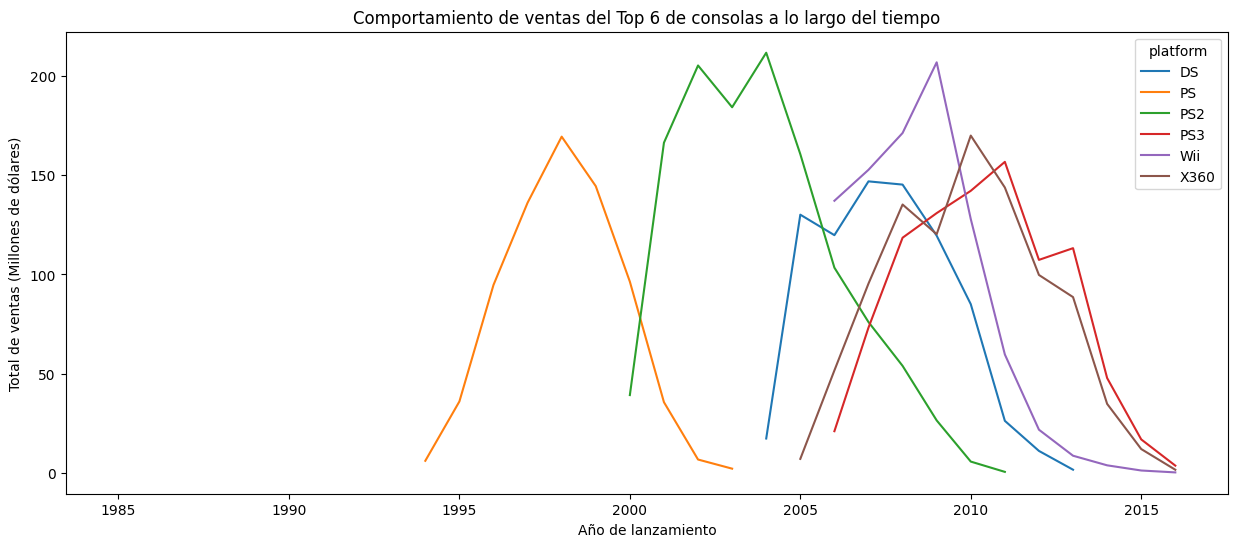

In [33]:
#Crear una agrupacion de nuestros datos con ayuda de una tabla dinamica
top6_platform = df[df['platform'].isin(top6_platform_list)][['year_of_release', 'platform', 'total_sales']]
top6_platform.pivot_table(index='year_of_release',
                          columns='platform',
                          values='total_sales',
                          aggfunc='sum'
                        ).plot(kind='line',
                           figsize = [15,6],
                           xlabel='Año de lanzamiento',     
                           ylabel='Total de ventas (Millones de dólares)',
                           title='Comportamiento de ventas del Top 6 de consolas a lo largo del tiempo')

                                         

plt.show()

Conclusion: Como se muestra en la gráfica, las plataformas tienden a tener un auge de popularidad en sus ventas y llegan a un pico de ventas y luego decaen. Esto puede obedecer al hecho que las nuevas tecnologías que van saliendo gozan de mayor popularidad además que las plataformas empiezan a quedar obsoletas. 

In [34]:
#Calcular cuanto tiempo se demoran en aparecer las plataforma
#Buscaremos el valor minimo del año de lanzamiento, asumiendo que el primer juego de una plataforma indica el lanzamiento de esta.
release_platform = df.groupby("platform")["year_of_release"].min().sort_values().reset_index()
release_platform

,platform,year_of_release
0,2600,1980
1,NES,1983
2,DS,1985
3,PC,1985
4,GB,1988
5,SNES,1990
6,GEN,1990
7,GG,1992
8,SCD,1993
9,NG,1993


In [35]:
#Ahora veremos las diferencias entre los años de lanzamiento de cada plataforma
#la almecenaremos en una columna nueva
#El metodo .diff() nos ayuda a calcular la diferencia entre los valores que tenemos en el DF en este caso los valores min.
#En este caso sacaremos la diferencia entre los años de lanzamiento y luego el promedio para responder la pregunta:
release_platform["year_dif"] = release_platform["year_of_release"].diff()
print(f"El tiempo promedio que tardan las plataformas nuevas en aparecer es: ", release_platform["year_dif"].mean())

El tiempo promedio que tardan las plataformas nuevas en aparecer es:  1.1


In [36]:
#Ahora veremos cuanto demoran en desaparecer las plataformas desde que aparecer
#Para esto hallaremos y almacenaremos los valores maximos y minimos, luego restaremos los valores maximos por los minimos.
platform_min = df.groupby("platform")["year_of_release"].min()
platform_max = df.groupby("platform")["year_of_release"].max()
#Ahora calcularemos la diferencia y luego calcularemos el promedio
duration_platform_avg = (platform_max - platform_min).mean()
print("El tiempo promedio de duración de las plataformas es de:", round(duration_platform_avg, ndigits= 2), "años")

El tiempo promedio de duración de las plataformas es de: 7.61 años


### Determinar el periodo para tomar los datos ###

In [37]:
#Eliminar años con muy poca venta
df.query("year_of_release >= 2011", inplace=True)

Aqui eliminamos los años en el cual este rubro era practicamente inexistente en comparacion a lo que es ahora, o lo que empezo a ser despues de la "revolucion tecnologica", escogi el año 1995 para tomar en cuenta desde allí en adelante gracias a la informacion que nos dio el grafico anterior. Los años anteriores prefiero ignorarlos para el analisis de los datos.

### Plataformas lideres en venta ###

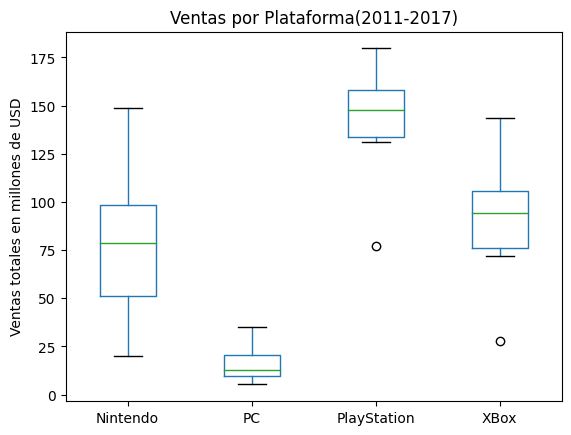

In [38]:
#Ver distribucion de las ventas totales desde 2011 en adelante (con plataformas agrupadas)
#Creamos un diagrama de caja con la distribucion de los juegos por plataformas(agrupadas)
sales_per_platform = df.pivot_table(
    index = "year_of_release",
    columns = "platform_group",
    values = "total_sales",
    aggfunc = "sum")

sales_per_platform.plot(kind= "box",
                       title= "Ventas por Plataforma(2011-2017)",
                       ylabel= "Ventas totales en millones de USD",
                       )

plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

Respuesta: Okey muchas gracias, lo tendre muy presente en futuros trabajos, muy agradecido por compartir su recomendacion

Aqui podemos ver que PlayStation es la plataforma con mas media en las ventas totales entre los 2011 y 2017. Si bien PlayStation(Sony) es la plataforma con mas media en las ventas, no tiene una distribucion tan dispersa en comparacion a Nintendo, que sin duda estas plataformas junto a Xbox son las 3 que dominan el mercado.

para la pregunta:¿Cuales crecen y cuales se reducen? la respuesta para eso es que todas tienen un momento de creciemiento, donde llegan a un pico de ventas y todas tienden a reducir hasta quedar obsoletas. 
llama la atencion y cabe destacar el auge que tuvieron "PS2","X360","PS3","Wii","DS","PS", las cuales previamente seleccione para mi top de 6 plataformas con mas altas ventas, usando un parametro de 500 millones de USD en ventas, y que previamente vimos los graficos mas en detalle, comportamiento el cual marca la pauta de las demas plataformas.

### Mirar como afectan las criticas a las ventas  ###

In [39]:
#Ver como afectan las criticas de expertos y de los usuarios a las ventas de una plataforma popular a eleccion(PS)
#Ver su correlacion
df_ps = df[df["platform_group"]=="PlayStation"]
df_ps[["total_sales","critic_score","user_score"]].describe()

,total_sales,critic_score,user_score
count,1847.000000,1847.000000,1847.000000
mean,0.456400,71.141852,71.741202
std,1.205484,7.964739,10.866627
min,0.010000,13.000000,2.000000
25%,0.030000,71.000000,73.000000
50%,0.110000,71.000000,75.000000
75%,0.360000,71.000000,75.000000
max,21.050000,97.000000,93.000000


Podemos ver aqui ver la informacion estadistica que nos proporciona el metodo describe(), con esta informacion podemos ver las medias de ventas, las medias de los criticos expertos y la de la critica de los usuarios, a demas de sus valores maximos, minimos, medio entre algunos datos estadisticos, esto es de gran ayuda ya que podemos sacar conclusiones superficiales y tener una idea inicial firme que despues comprobaremos calculando su correlacion. 

In [40]:
#Veamos su correlacion
df_ps[["total_sales","critic_score","user_score"]].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.321871,-0.108360
critic_score,0.321871,1.000000,0.439678
user_score,-0.108360,0.439678,1.000000


Aqui podemos ver las correlaciones en el cual podemos concluir que tienen una correlacion mayoritariamente postiva, ya que en todos los valores de correlacion dieron numeros positivos, mas fuertemente entre la critica de los expertos y la de los usuarios(0.554), pero si analizamos el coeficiente de ventas hay mayor correlacion con la critica de los expertos(0.402) que con la critica de los usuarios(0.127) aunque ambos tienen una correlacion positiva. Pudiendo inferir que hay mayor importancia o relacion en las ventas gracias a las criticas de los expertos que con la critica de los usuarios, aunque en ambos casos hay una relacion positiva. 

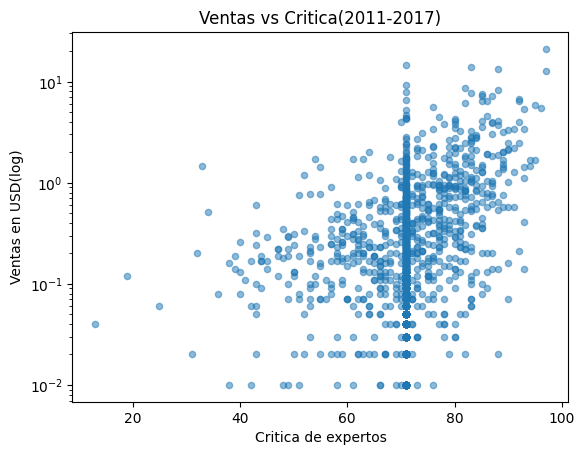

In [41]:
#hacer un grafico de dispersion para ver su correlacion graficamente
df_ps[["total_sales","critic_score","user_score"]].plot(kind="scatter",
                                                       x="critic_score",
                                                       y="total_sales",
                                                       alpha= 0.5,
                                                       ylabel="Ventas en USD(log)",
                                                       xlabel="Critica de expertos",
                                                       title="Ventas vs Critica(2011-2017)" 
                                                       )
plt.yscale("log")
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

Aqui podemos ver una correlacion positiva claramente en el grafico, lo cual nos confirma lo que ya veniamos pensando: que es una correlacion positiva. Gracias a la funcion "plt.yscale(log)" que nos sirve para mejorar la visualizacion sin perder la correlacion, usando logaritmos en esta funcion para "estirar" o "rescalar" el grafico.

### Comparar la venta de juegos  en distintas plataformas ###

In [42]:
#Comparar los mismos juegos en otra plataforma
#elegir un juego que se repita en varias plataformas
filter_xbox_ps = df[["year_of_release","name","platform","total_sales"]] #seleccionamos un df con las columnas que queremos
filter_xbox_ps = filter_xbox_ps[filter_xbox_ps["name"]=="Grand Theft Auto V"] #elegimos el juego(GTA V)
cols = ["X360","PS3"] #elegimos las plataformas a comparar
filter_xbox_ps.query("platform in @cols", inplace=True) # aplicamos las plataformas elegidas al df
filter_xbox_ps

,year_of_release,name,platform,total_sales
16,2013,Grand Theft Auto V,PS3,21.05
23,2013,Grand Theft Auto V,X360,16.27


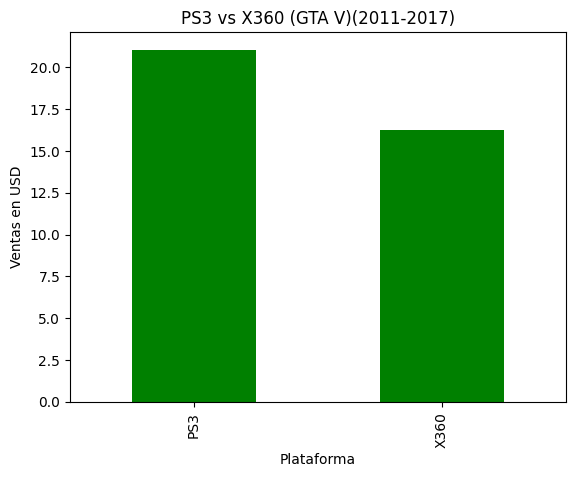

In [43]:
filter_xbox_ps.plot(kind="bar",
                    x= "platform",
                    y= "total_sales",
                    title= "PS3 vs X360 (GTA V)(2011-2017)",
                    xlabel= "Plataforma",
                    ylabel= "Ventas en USD",
                    legend=False,
                    color= "green"
                   )

plt.show()

Aqui comparamos un mismo juego que elegimos(GTA V) que elegimos ya que era un juego que se encontraba presente en varias plataformas de grupos diferentes, podemos ver que como nos a sugerido nuestro analisis hasta ahora Playstation saca ventajas en ventas.

### Ventas totales por genero ### 

In [44]:
#Ver que tal las ventas segun su genero
data_total_genre = df.groupby("genre")["total_sales"].sum()
data_total_genre

genre
Action          557.80
Adventure        45.04
Fighting         66.90
Misc            139.42
Platform         88.68
Puzzle            9.85
Racing           88.23
Role-Playing    245.63
Shooter         402.91
Simulation       50.26
Sports          237.14
Strategy         22.16
Name: total_sales, dtype: float64

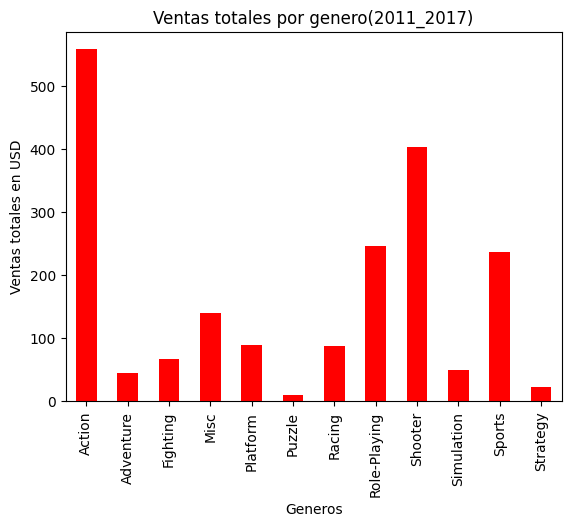

In [45]:
data_total_genre.plot(kind="bar",
                title="Ventas totales por genero(2011_2017)",
                ylabel="Ventas totales en USD",
                xlabel="Generos",
                color="red"
               )
plt.show()

Podemos visualizar las ventas totales por genero, en analisis posteriores veremos con mayor detalle como se distribuyen estas por regiones. 

# 4 Crear un perfil de usuario para cada region

## Plataformas por region ##

In [46]:
#Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
platform_principales = df.groupby("platform").agg(
    na_sales = ("na_sales", "sum"),
    eu_sales = ("eu_sales", "sum"),
    jp_sales = ("jp_sales", "sum")
)
platform_principales.sort_values(by=["na_sales","eu_sales","jp_sales"], ascending=False)

,na_sales,eu_sales,jp_sales
platform,,,
X360,226.80,117.10,3.35
PS3,168.26,163.09,49.39
PS4,108.74,141.09,15.96
XOne,93.12,51.59,0.34
3DS,82.65,61.27,100.62
Wii,48.56,29.60,8.97
WiiU,38.10,25.13,13.01
PC,29.88,56.64,0.00
DS,18.86,9.24,8.04


Gracias a esta informacion podemos ver las cinco plataformas principales que mas se venden por region, siendo estas 5 con mayor impacto, las cuales son estas: "PS3", "X360", "PS4, "3DS", "XOne".

In [47]:
#Analizamos solo las 5 plataformas mas importantes.
top_5_na = df.groupby("platform")["na_sales"].sum().sort_values(ascending=False)[:5].reset_index()
top_5_eu = df.groupby("platform")["eu_sales"].sum().sort_values(ascending=False)[:5].reset_index()
top_5_jp = df.groupby("platform")["jp_sales"].sum().sort_values(ascending=False)[:5].reset_index()

Aqui solamente seleccionamos las plataformas mas importantes para nuestro analisis, ignoraremos las otras plataformas mientras tanto, aunque previamente visualizamos sus datos, por lo que estaran disponibles en caso de que queramos echarles un vistazo, por ahora nos interesan solamente las 5 plataformas mas importantes. 

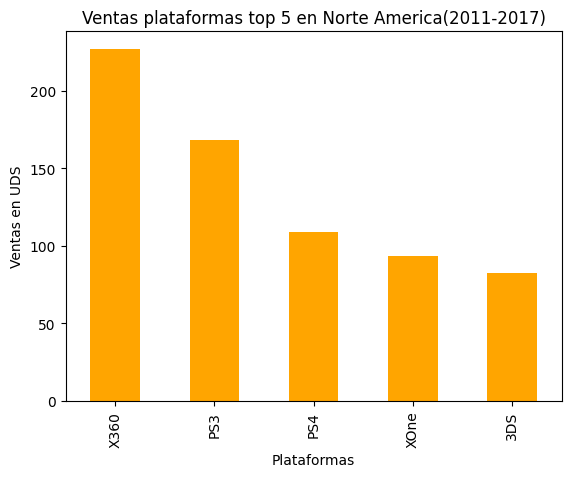

In [48]:
#plataformas con mas ventas en norte america
top_5_na.plot(kind="bar",
              x="platform",
              y="na_sales",
              title="Ventas plataformas top 5 en Norte America(2011-2017)",
              xlabel="Plataformas",
              ylabel="Ventas en UDS",
              legend=False,
              color="orange"
             )
plt.show()

Podemos ver el gran impacto que tuvo X360 en Norte America en con mas de 200 millones(USD) de ventas, se puede apreciar un claro dominio de Xbox y de PlaySation en norte america. Por la parte de nintendo su plataforma 3DS aparece como la 5ta que mas vende en Norte America, teniendo numeros mas que aceptables.    

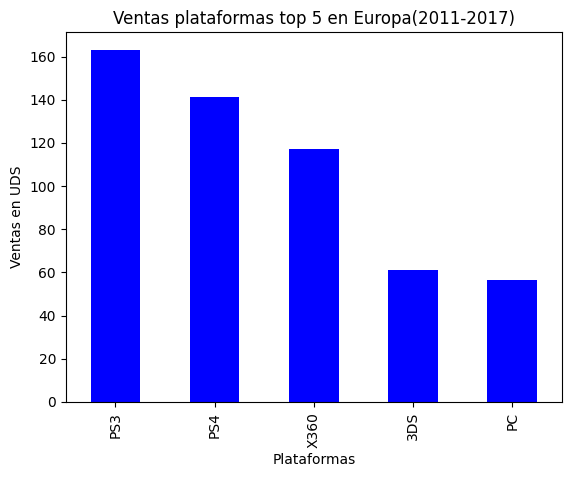

In [49]:
#plataformas con mas ventas en europa
top_5_eu.plot(kind="bar",
              x="platform",
              y="eu_sales",
              title="Ventas plataformas top 5 en Europa(2011-2017)",
              xlabel="Plataformas",
              ylabel="Ventas en UDS",
              legend=False,
              color="b"
             )
plt.show()

Podemos apreciar que en Europa hay una presencia mas dominante por parte de PlayStation con sus plataformas PS3 mas fuertemente y con PS4 que la sigue. Xbox se queda un poco mas atras en comparacion a como fue su presencia en Norte America, es mas nisiquiera esta en el top 5 su plataforma XOne, por otro lado Nintendo con su plataforma 3DS tienen buenos numeros y esta en un puesto numero 4, aparece PC en el 5to lugar con numeros bastante buenos.

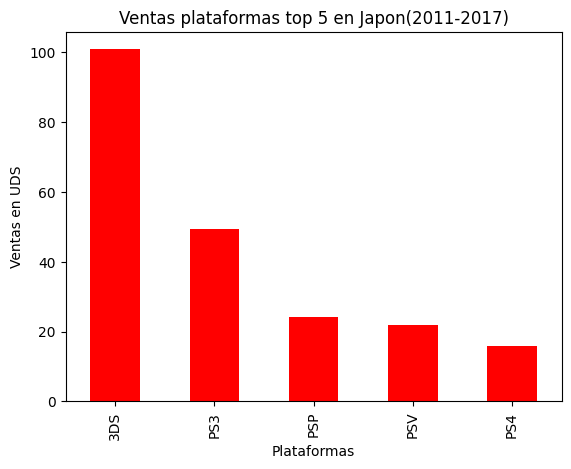

In [50]:
#plataformas con mas ventas en japon
top_5_jp.plot(kind="bar",
              x="platform",
              y="jp_sales",
              title="Ventas plataformas top 5 en Japon(2011-2017)",
              xlabel="Plataformas",
              ylabel="Ventas en UDS",
              legend=False,
              color="red"
             )
plt.show()

Podemos ver como cambia la region de japon respecto a las demas regiones que hemos analizado, primero que nada Xbox practicamente no aparece, tiene numeros muy bajos. A demas el resaltado protagonismo de otras plataformas como por ejemplo la 3DS en primer lugar con mas 100 millones(USD) en ventas, y la aparicion de las plataformas como PSP y PSV que no aparecian en las regiones anteriores. Por otra parte se repite la presencia permanente de plataformas de PlayStation sobretodo en sus plataformas de PS3 y PS4.

##  Generos de juegos por region ##

In [51]:
#Veamos la informacion de los generos en cada region 
genre_per_region = df.groupby("genre").agg(
    na_sales = ("na_sales", "sum"),
    eu_sales = ("eu_sales", "sum"),
    jp_sales = ("jp_sales", "sum")
)
genre_per_region

,na_sales,eu_sales,jp_sales
genre,,,
Action,230.92,199.12,63.62
Adventure,14.76,13.96,12.07
Fighting,31.63,16.24,12.38
Misc,69.69,39.72,17.60
Platform,38.28,30.07,12.13
Puzzle,2.74,3.56,2.91
Racing,31.98,40.52,5.64
Role-Playing,83.78,62.30,79.87
Shooter,194.43,148.02,11.92


In [52]:
genre_per_region_part = genre_per_region/genre_per_region.sum()*100
genre_per_region_part

,na_sales,eu_sales,jp_sales
genre,,,
Action,27.829734,29.731828,25.898636
Adventure,1.778828,2.084453,4.913495
Fighting,3.811946,2.424894,5.039691
Misc,8.398814,5.930837,7.164665
Platform,4.613382,4.489936,4.937920
Puzzle,0.330216,0.531565,1.184612
Racing,3.854126,6.050290,2.295950
Role-Playing,10.096895,9.302395,32.513739
Shooter,23.432077,22.101774,4.852432


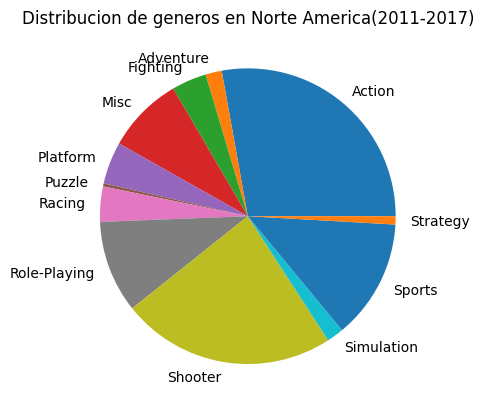

In [53]:
#Visualizar los datos para norte america
genre_per_region_part["na_sales"].plot(kind="pie",
                                       title= "Distribucion de generos en Norte America(2011-2017)",
                                       ylabel= "")
plt.show()

Podemos ver que en Norte America los 5 generos que mas quiere la gente son en primer lugar los juegos de accion con: 27.829734 millones(USD) de ventas, en segundo lugar los juegos shooter con: 23.432077 millones(USD) de ventas, en tercer lugar los juegos de deportes(sports) con: 13.100174 millones(USD) de ventas, en cuarto lugar los de roles(role-playing) con: 10.096895 millones(USD) en ventas, en quinto lugar los juegos misc(juegos que no entran a ninguna otra clasificacion) con: 8.398814 millones(USD) en ventas.

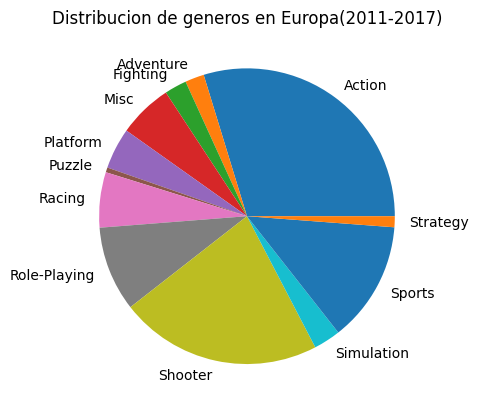

In [54]:
#vizualizar los datos para Europa
genre_per_region_part["eu_sales"].plot(kind="pie",
                                       title= "Distribucion de generos en Europa(2011-2017)",
                                       ylabel= "")
plt.show()

Podemos ver que Europa sigue una tendencia similar en la eleccion de generos por los usuarios que en Norte America, los juegos de accion se mantienen en primer lugar con 29.731828 Millones (USD) en ventas, en segundo lugar los juegos shooter con: 22.101774 Millones USD en ventas, tercer lugar juegos de deporte(sports) con: 13.209998 Millones USD en ventas, cuarto lugar juegos de roles(role-playing) con: 9.302395 Millones USD en ventas, y en quinto lugar los juegos de carrera(racing) y aqui hay una diferencia en el top 5 en comparacion a Norte america con los juegos de carrera, con un total de ventas de: 6.050290 Millones de USD.

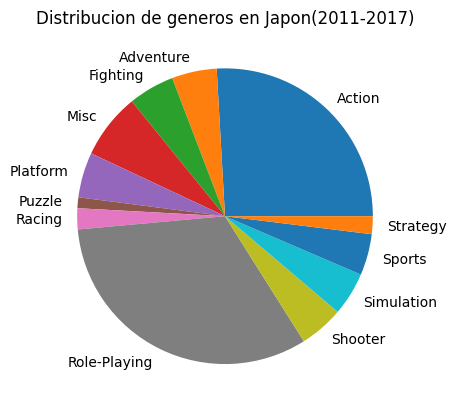

In [55]:
#Visualizar los datos de Japon
genre_per_region_part["jp_sales"].plot(kind="pie",
                                       title= "Distribucion de generos en Japon(2011-2017)",
                                       ylabel= "")
plt.show()

En esta region podemos ver mayores diferencias en comparacion a los otros, tenemos en primer lugar a los juegos de roles con: 32.513739 Millones USD en ventas, segundo logar para los juegos de accion con: 25.898636 Millones USD en ventas. Hasta ahi cambio solamente entre el primer y segundo lugar en comparacion a las otras regiones, pero ahora hay mas cambios, ya que las otras plataformas estan mucho mas parejas que en Norte America y Europa.
En tercer lugar estan los juegos de misc(que no entran en otra clasificacion) con: 7.164665 Millones USD en ventas, cuarto lugar para los juegos de pelea(fighting) con: 5.039691 Millones USD en ventas, y el quinto lugar para los juegos de plataformas con: 4.937920 Millones USD en ventas.

## Si las clasificaciones de ESRB afectan a las ventas en regiones individuales. ##

In [56]:
#
ESRB_per_region = df.groupby("rating_clarity").agg(
    na_sales = ("na_sales", "sum"),
    eu_sales = ("eu_sales", "sum"),
    jp_sales = ("jp_sales", "sum")
)
ESRB_per_region

,na_sales,eu_sales,jp_sales
rating_clarity,,,
Early Childhood,0.42,0.00,0.00
Everyone,170.17,141.72,36.68
Everyone +10,117.72,78.00,11.23
Mature,308.45,250.26,26.14
Pending,123.69,116.64,138.21
Teens,109.31,83.10,33.39


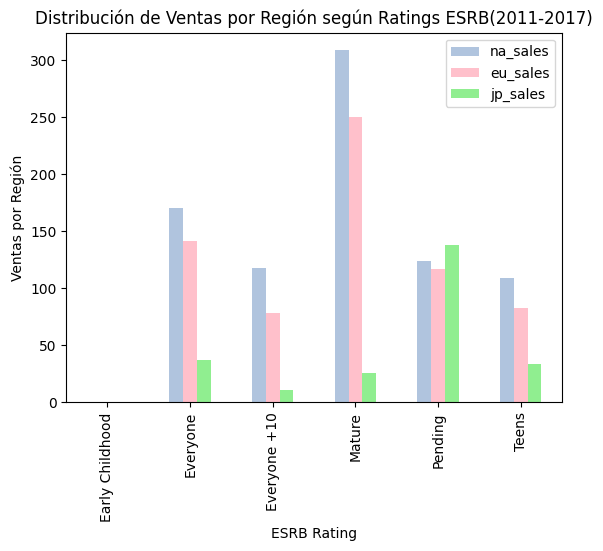

In [57]:
#
ESRB_per_region.plot(
        y=['na_sales','eu_sales', 'jp_sales'],
        kind='bar',
        title= 'Distribución de Ventas por Región según Ratings ESRB(2011-2017)',
        xlabel= 'ESRB Rating',
        ylabel= 'Ventas por Región',
        color= ['lightsteelblue', 'pink', 'lightgreen'],
        
       )

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

Conclusion: Podemos ver que las elecciones de los usuarios de Japon son bastante diferentes a las elecciones de los usuarios de las otras regiones, los usuarios japoneses prefieren mas los juegos sin clasificacion o con clasificacion pendiente. En cambio los usuarios de Norte America y Europeos prefieren los juegos para mayores, para usuarios mas maduros.. pero de igual forma las clasificaciones que suelen elegir los usarios de EU y NA se distribuyen de mejor forma que los usuarios de JP por las diversas clasificaciones ESRB. 

# 5 Pruebas de hipotesis #

In [58]:
#Prueba de hipotesis de las calificaciones promedio de los usuarios para las plataformas Xbox One y PC
#Primero tomaremos los registro NO nulos y los asignaremos a una nueva variable
df_not_null_user_score = df[~df["user_score"].isna()]
df_not_null_user_score["user_score"].unique()

array([82., 81., 34., 75., 53., 48., 32., 83., 84., 26., 78., 72., 70.,
       87., 43., 66., 57., 50., 74., 65., 91., 73., 69., 64., 61., 86.,
       79., 67., 54., 40., 85., 90., 49., 45., 62., 42., 63., 77., 92.,
       76., 80., 37., 41., 58., 56., 68., 55., 44., 59., 89., 39., 31.,
       29., 60., 47., 71., 88., 51., 35., 25., 30., 27., 22., 52., 18.,
       38., 33., 46., 93., 16., 36., 24., 28., 17., 21., 20., 15.,  7.,
        2., 12.,  9., 19., 13., 10., 14., 23.])

In [59]:
#Con registros sin datos nulos ahora trabajaremos mejor
#Vamos a separar en variables distintas los "user_score" por plataformas respectivas(Xbox One y PC)
not_null_users_xone = df_not_null_user_score[df_not_null_user_score["platform"]=="XOne"]["user_score"]
not_null_users_pc = df_not_null_user_score[df_not_null_user_score["platform"]=="PC"]["user_score"]
print(not_null_users_xone.describe())
print()
print(not_null_users_pc.describe())

count    247.000000
mean      67.789474
std       12.607755
min       16.000000
25%       61.000000
50%       72.000000
75%       75.000000
max       92.000000
Name: user_score, dtype: float64

count    388.000000
mean      66.680412
std       14.926380
min       14.000000
25%       59.000000
50%       73.000000
75%       75.000000
max       93.000000
Name: user_score, dtype: float64


In [60]:
#Prueba de Hipotesis
#Hipotesis Nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
#Hipotesis Alt: Las calificaciones promedio de los usuarios de Xbox One son diferentes a los de PC.
#Ahora veremos si las varianzas son iguales a traves del metodo levene
res_levene_xone_pc = st.levene(not_null_users_xone,not_null_users_pc)
print('Levene statistic es',res_levene_xone_pc.statistic)
print('P-value es',res_levene_xone_pc.pvalue)
if res_levene_xone_pc.pvalue > 0.05:
    print('Probablemente la misma varianza')
else:
    print('Probablemente no es la misma varianza')

Levene statistic es 4.336448228188237
P-value es 0.03770564332407412
Probablemente no es la misma varianza


In [61]:
#TTEST
alpha= 0.05
res_ttest = st.ttest_ind(not_null_users_xone, not_null_users_pc, equal_var=False)
print("el valor p es",res_ttest.pvalue)
if res_ttest.pvalue > alpha:
    print('No podemos rechazar la hipótesis nula')
else:
    print('Rechazamos la hipótesis nula')

el valor p es 0.31530345979550506
No podemos rechazar la hipótesis nula


Conclusion: En este caso no podemos rechazar la hipotesis nula, es decir hay muchas probabilidades que los promedios de calificaciones entre XOne y PC sean iguales NO son bajas(entre los años 2011-2017). Esto ya que su valor p es mayor que aplha.

In [62]:
#Vamos a separar en variables distintas los "user_score" por sus generos respectivas(accion y deportes)
not_null_users_action = df_not_null_user_score[df_not_null_user_score["genre"]=="Action"]["user_score"]
not_null_users_sports = df_not_null_user_score[df_not_null_user_score["genre"]=="Sports"]["user_score"]
print(not_null_users_action.describe())
print()
print(not_null_users_sports.describe())

count    1269.000000
mean       71.211190
std        10.384007
min        16.000000
25%        70.000000
50%        75.000000
75%        75.000000
max        91.000000
Name: user_score, dtype: float64

count    388.000000
mean      63.327320
std       16.192912
min        2.000000
25%       56.000000
50%       70.500000
75%       75.000000
max       88.000000
Name: user_score, dtype: float64


In [63]:
#Prueba de Hipotesis
#Hipotesis Nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
#Hipotesis Alt: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
#Ahora veremos si las varianzas son iguales a traves del metodo levene
res_levene_action_sports = st.levene(not_null_users_action,not_null_users_sports)
print('Levene statistic es',res_levene_xone_pc.statistic)
print('P-value es', res_levene_action_sports.pvalue)
if res_levene_action_sports.pvalue > 0.05:
    print('Probablemente la misma varianza')
else:
    print('Probablemente no es la misma varianza')

Levene statistic es 4.336448228188237
P-value es 2.105784521968029e-25
Probablemente no es la misma varianza


In [64]:
#TTEST
alpha= 0.05
res_ttest2 = st.ttest_ind(not_null_users_action,not_null_users_sports, equal_var=False)
print("el valor p es",res_ttest2.pvalue)
if res_ttest2.pvalue > alpha:
    print('No podemos rechazar la hipótesis nula')
else:
    print('Rechazamos la hipótesis nula')

el valor p es 3.719797736831272e-18
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Muy buen trabajo con el desarrollo de las pruebas de hipótesis. Además, agregaste la prueba de levene para mostrar el supuesto de varianzas iguales. 

Conclusion: En este caso rechazamos la hipotesis nula que nos decia que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes (entre los alos 2011-2017) son iguales ya que su valorp es claramente menor que alpha. por lo que hay muchas probabilidades que estas calificaciones sean distintas entre si

Metodos que se usaron:

En ambos casos se usó la prueba de Hipótesis sobre dos poblaciones, para probar la hipótesis de que dos poblaciones estadísticas son iguales según las muestras tomadas de ellas, aplica la función scipy.stats.ttest_ind(array1, array2, equal_var).

Previamente a la prueba desarrollada, se establece la Prueba Levene para determinar si ambas poblaciones tienen varianzas iguales.

Las hipótesis nulas y alternativas fueron formuladas de la siguiente forma: H0 = Los promedios de ambas muestras poblacionales son iguales. H1 = Los promedios de ambas muestras poblacionales son distintas.

# Conclusiones generales

En este proyecto hemos analizado la evolucion de la industria de los videojuegos y a su vez hemos podido ver como se comparta tambien la industria tecnologica en general, ya que estas obviamente estan relacionadas.
En un principio pudimos ver como crecian la cantidad de juegos y plataformas a medida que la industria tecnologica iba creciando por eso de los años 1995 con un claro bum tencologico.

Hemos podido ver cuanto se demoran las nuevas plataformas en promedio en aparecer(1.1 años) y cuanto demoran en desaparecer o quedar obsoletas en promedio(7.6 años). La cantidad de juegos que se lanzan al año para tener una mejor vision de como se comparta el mercado, como crecen la cantidad de empresas de este rubro.

Tambien hemos podido analizar las plataformas agrupadas e individualmente, para poder ver cuales son mas rentables y cuales no, cuales son las preferidas por los usuarios en cada region que analizamos(NA, EU, JP). Ademas de analizar sus diversos comportamientos.

Tambien hemos podido ver como afectan las criticas de los expertos y la criticas de los usuarios, como se relacionan con las ventas.

Hemos podido ver como se comportan las ventas segun su genero, en total y en cada region, dejando en claro en que region prefieren mas un tipo de genero y en cuales no, pudimos concluir que Japon se comportaba diferente de las demas regiones.

Tambien pudimos ver como se comportaban las ventas segun su clasificacion ESRB, dejandonos en claro las preferencias de la gente y en donde Japon nuevamente se comporta diferente a las demas regiones, obteniendo informacion valiosa de esto.

Para finalizar hicimos pruebas de hiportesis estadisticas donde pudimos verificar estaditicamente que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes(entre los años 2011-2017) son diferentes. y que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas(entre el año 2011-2017).

Gracias a todo estos procedimientos pudimos obtener valiosa informacion que puede ser muy valiosa para las empresas para darles poder saber como actuar y como moverse en este mercado en base a la informacion que se ha recolectado en este proyecto, pudiendo ser EXTREMADAMENTE UTIL.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Kanon, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    

    
</div>

Muchas gracias en general por sus recomendaciones, me hicieron ver en que cosas aun sigo siendo algo "inocente" y que cosas puedo seguir puliendo, sin duda alguna tomare los consejos y recomendaciones sobretodo para lo que se viene del camino. muchas gracias.